## Observations and Insights 

1. Our drug treatment of interest, Capomulin, is in tight competition with drug treatment Ramicane for best results on final tumor volume. This conclusion is supported by the summary stats tables as well as the box plot comparison.
2. The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84. This is a strong, positive correlation. Further analysis may need to be performed to determine if this correlation is hinting that our drug is less effective for mice of higher weights or if this is simply an indication that mice of higher weights tend to have larger tumors.
3. Based on the gender pie chart, we can see that this study as a whole is pretty evenly balanced between male and female mice.  As long as the genders are also balanced in each drug regimen, we can feel more confident that we have representative samples along gender lines.

## Setup

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
detail_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
detail_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1888,m601,Capomulin,Male,22,17,25,33.118756,1
1889,m601,Capomulin,Male,22,17,30,31.758275,1
1890,m601,Capomulin,Male,22,17,35,30.834357,1
1891,m601,Capomulin,Male,22,17,40,31.378045,1


## Clean Data

In [23]:
# Checking the number of mice
num_mice = len(detail_results["Mouse ID"].unique())
num_mice

249

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
count_mice_time = pd.DataFrame(detail_results[["Mouse ID","Timepoint"]].value_counts()).reset_index()
duplicate_mice_time = count_mice_time.loc[count_mice_time[0] > 1, :]
duplicate_mice_ids = duplicate_mice_time["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [25]:
# Get all the data for the duplicate Mouse ID
duplicate_mice_data = detail_results.loc[detail_results["Mouse ID"] == duplicate_mice_ids[0], :]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
860,g989,Propriva,Female,21,26,0,45.000000,0
861,g989,Propriva,Female,21,26,0,45.000000,0
862,g989,Propriva,Female,21,26,5,48.786801,0
863,g989,Propriva,Female,21,26,5,47.570392,0
864,g989,Propriva,Female,21,26,10,51.745156,0
865,g989,Propriva,Female,21,26,10,49.880528,0
866,g989,Propriva,Female,21,26,15,51.325852,1
867,g989,Propriva,Female,21,26,15,53.442020,0
868,g989,Propriva,Female,21,26,20,55.326122,1
869,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by ID
clean_results = detail_results.loc[detail_results["Mouse ID"] != duplicate_mice_ids[0], :]
clean_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1888,m601,Capomulin,Male,22,17,25,33.118756,1
1889,m601,Capomulin,Male,22,17,30,31.758275,1
1890,m601,Capomulin,Male,22,17,35,30.834357,1
1891,m601,Capomulin,Male,22,17,40,31.378045,1


In [27]:
# Checking the number of mice in the clean DataFrame
num_mice = len(clean_results["Mouse ID"].unique())
num_mice

248

## Summary Statistics

In [28]:
# change column width of dataframe displays
from IPython.core.display import HTML
HTML("<style>.rendered_html th {max-width: 100px;}</style>")

In [32]:
# group clean_results df by drug so calculations can be performed
regimen_group = clean_results.groupby("Drug Regimen")

# create a new dataframe with a column of all unique drug regimens
summary_stats_df = pd.DataFrame(regimen_group["Drug Regimen"].unique())

# calculate all summary stats & add as columns to the new dataframe
summary_stats_df["Mean Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].mean()
summary_stats_df["Median Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].median()
summary_stats_df["Variance Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].var()
summary_stats_df["Standard Deviation Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].std()
summary_stats_df["SEM Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].sem()

# delete duplicate drug regimen column
del summary_stats_df["Drug Regimen"]

# format all columns to two decimals
for x in range(0,5):
    summary_stats_df.iloc[:,x] = summary_stats_df.iloc[:,x].map("{:.2f}".format)

# show dataframe
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [36]:
# use aggregation method to produce the same summary stats table as above & rename columns
simple_summary_stats_df = regimen_group["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]) \
                        .rename(columns={"mean": "Mean Tumor Volume", 
                                         "median": "Median Tumor Volume", 
                                         "var": "Variance Tumor Volume", 
                                         "std": "Standard Deviation Tumor Volume",
                                         "sem": "SEM Tumor Volume"})

# format all columns to two decimals
for x in range(0,5):
    simple_summary_stats_df.iloc[:,x] = simple_summary_stats_df.iloc[:,x].map("{:.2f}".format)

# show dataframe
simple_summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

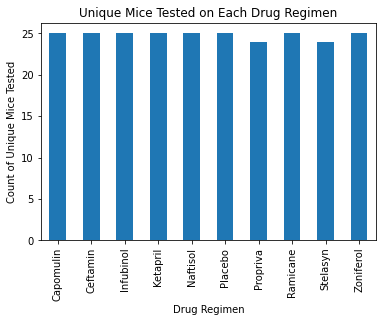

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas
unique_mice_counts = regimen_group["Mouse ID"].unique().str.len()
unique_mice_bar = unique_mice_counts.plot.bar(ylabel="Count of Unique Mice Tested",title="Unique Mice Tested on Each Drug Regimen")
plt.show()

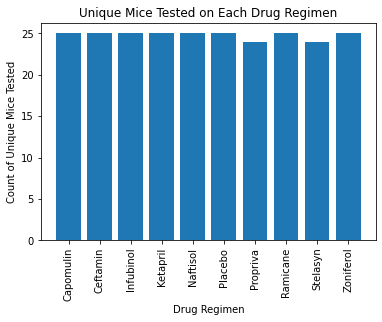

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot
x_axis = [x for x in clean_results["Drug Regimen"].sort_values().unique()]
plt.bar(x_axis, unique_mice_counts)
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Unique Mice Tested")
plt.title("Unique Mice Tested on Each Drug Regimen")
plt.xticks(rotation=90)
plt.show()

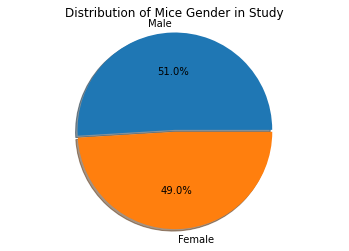

In [12]:
# get value counts of each sex
mice_gender = clean_results["Sex"].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_pie = mice_gender.plot.pie(explode=[.01,.01], title="Distribution of Mice Gender in Study", shadow=True, autopct="%1.1f%%",ylabel="")
mice_gender_pie.axis('equal')
plt.show()

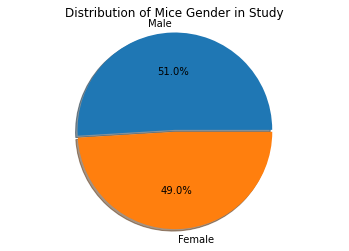

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
plt.pie(mice_gender, explode=[.01,.01], shadow=True, autopct="%1.1f%%", labels=labels)
plt.axis("equal")
plt.title("Distribution of Mice Gender in Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# get the greatest timepoint for each mouse
last_mouse_time = clean_results[["Mouse ID", "Timepoint"]].groupby("Mouse ID")["Timepoint"].max()
last_mouse_time = pd.DataFrame(last_mouse_time)

# inner merge max df to clean df to get only data contained in both dataframes 
# (filter out all data that isn't a max timepoint for a specific mouse)
data_last_time = pd.merge(clean_results, last_mouse_time, how="inner", on=["Mouse ID","Timepoint"])
data_last_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,45,38.982878,2
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,35,71.905117,0
3,a457,Ketapril,Female,11,30,10,49.783419,0
4,c819,Ketapril,Male,21,25,40,62.175705,1
...,...,...,...,...,...,...,...,...
243,t565,Capomulin,Female,20,17,45,34.455298,0
244,i557,Capomulin,Female,1,24,45,47.685963,1
245,m957,Capomulin,Female,3,19,45,33.329098,1
246,f966,Capomulin,Male,16,17,20,30.485985,0


In [15]:
# Put treatments into a list
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data
tumor_vol = []

# Quantitatively determine if there are any potential outliers 
# loop through treatments
for treatment in treatments:
    # locate the rows which contain mice on selected treatment and get the tumor volumes
    tumor_data = data_last_time.loc[data_last_time["Drug Regimen"] == treatment, ["Tumor Volume (mm3)"]]
    tumor_vol.append(tumor_data.values.flatten())
    
    # calculate first quartile, third quartile, IQR, and upper and lower bound for each treatment's tumor volume data
    Q1 = tumor_data.quantile(.25)
    Q3 = tumor_data.quantile(.75)
    IQR = Q3 - Q1
    upperbound = Q3 + 1.5 * IQR
    lowerbound = Q1 - 1.5 * IQR

    # filter tumor data to see if any values fall outside of the lower & upper bounds
    outliers = tumor_data.loc[(tumor_data["Tumor Volume (mm3)"] < lowerbound[0]) | (tumor_data["Tumor Volume (mm3)"] > upperbound[0]),:]
    
    # print associated statement depending on if the dataset has any outliers or not
    if outliers.empty:
        print(f"{treatment} has no outliers.")
    else:
        print(f"{treatment} Outliers:\n{outliers.values.flatten()}")

Capomulin has no outliers.
Ramicane has no outliers.
Infubinol Outliers:
[36.3213458]
Ceftamin has no outliers.


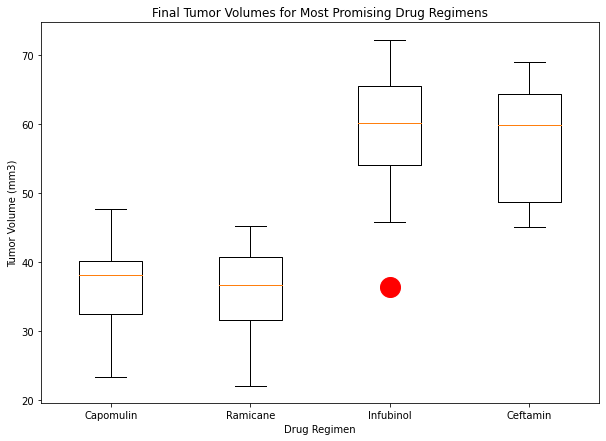

In [41]:
# in a single figure, generate box plots of the final tumor volume of each mouse across four treatments
flierprops = dict(markersize=20)
fig, ax = plt.subplots(figsize=(10,7))

tumor_vol_bp = ax.boxplot(tumor_vol, sym="ro", flierprops=flierprops)
ax.set_xticklabels(treatments)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Final Tumor Volumes for Most Promising Drug Regimens")
plt.show()

## Line and Scatter Plots

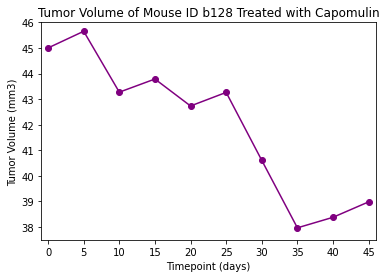

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse (Mouse ID b128, in this case) treated with Capomulin
timepoint = [x for x in range(0,50,5)]
cap_mouse_b128 = clean_results.loc[clean_results["Mouse ID"]=="b128",["Tumor Volume (mm3)", "Timepoint"]].set_index("Timepoint",drop=True)
plt.plot(timepoint, cap_mouse_b128, marker="o", color="purple")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of Mouse ID b128 Treated with Capomulin")
plt.xticks(timepoint)
plt.xlim([-1,46])
plt.ylim([37.5,46])
plt.show()

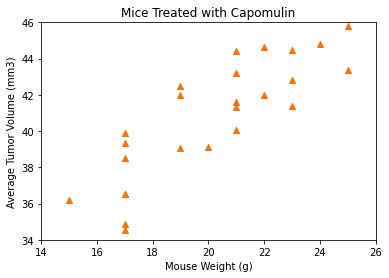

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_regimen = clean_results.loc[clean_results["Drug Regimen"] == "Capomulin",:].groupby("Mouse ID")
weights = cap_regimen["Weight (g)"].mean()
avg_tumor_vol = cap_regimen["Tumor Volume (mm3)"].mean()
plt.scatter(weights, avg_tumor_vol, marker="^", color="#F97306")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mice Treated with Capomulin")
plt.xlim([14,26])
plt.ylim([34,46])
plt.show()

## Correlation and Regression

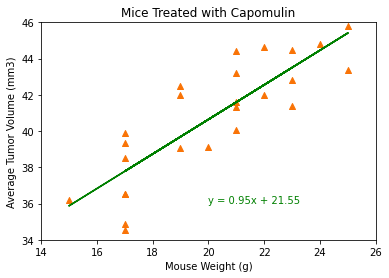

The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is 0.84. This is a strong, positive correlation.


In [47]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, avg_tumor_vol)
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the linear regression with the scatter plot from above
plt.scatter(weights, avg_tumor_vol, marker="^", color="#F97306")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mice Treated with Capomulin")
plt.xlim([14,26])
plt.ylim([34,46])
plt.plot(weights, regress_values, "g-")
plt.annotate(line_eq, (20,36), color="g")
plt.show()

# Calculate the correlation coefficient & print below chart
correlation, p = st.pearsonr(weights, avg_tumor_vol)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is {round(correlation,2)}. This is a strong, positive correlation.")